In [29]:
import pandas as pd
import numpy as np

data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
display(data.columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [31]:
data = data.rename(columns={'EmploymentStatus': 'Employment Status'})

data.columns = [colname.lower().replace(' ','_') for colname in data.columns]
display(data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [32]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [33]:
# Data is already cleaned in the latest source, no NaN visible
# data = data.drop(['Vehicle Type'], axis=1)     # Column does no longer exist in source data file

In [34]:
data = data.drop(['customer'], axis = 1)
data.shape

(9134, 23)

In [35]:
data.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [36]:
data['effective_to_Date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_month'] = list(map(lambda x: x.month, data['effective_to_Date']))
data = data[data['effective_to_month'] <=3 ]

In [37]:
data.info

<bound method DataFrame.info of            state  customer_lifetime_value response  coverage education  \
0     Washington              2763.519279       No     Basic  Bachelor   
1        Arizona              6979.535903       No  Extended  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     effective_to_date employment_status gender  income location_code  ...  \
0

In [38]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


### Plot total Responses

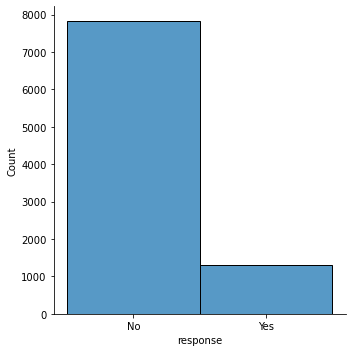

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.displot(data['response'])
plt.show()

### Plot Response Rate per sales channel

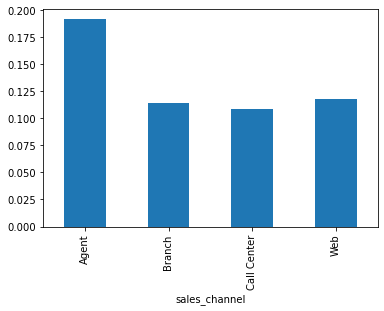

In [45]:
data['response_rate'] = data['response'].apply(lambda x: 1 if x == 'Yes' else 0)
data.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

### Plot Respone Rate by Total Claim Amount

In [46]:
data['total_claim_amount'].min()

0.099007

In [47]:
data['total_claim_amount'].max()

2893.239678

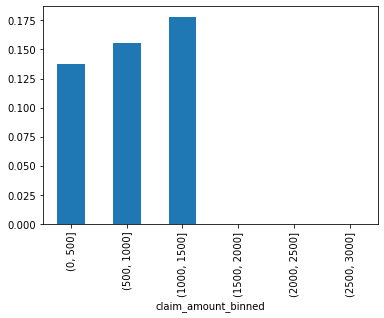

In [48]:
bins_claim_amount = [0, 500, 1000, 1500, 2000, 2500, 3000]
data['claim_amount_binned'] = pd.cut(data['total_claim_amount'], bins_claim_amount)
data.groupby('claim_amount_binned')['response_rate'].mean().plot.bar()
plt.show()

### Plot Respone Rate by Income

In [49]:
data['income'].min()

0

In [50]:
data['income'].max()

99981

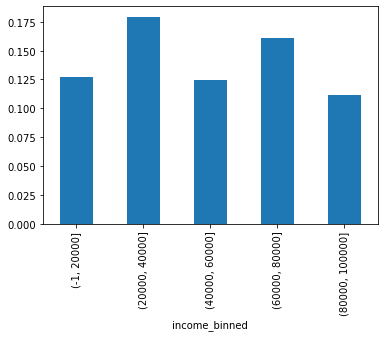

In [51]:
bins_income = [-1, 20000, 40000, 60000, 80000, 100000]
data['income_binned'] = pd.cut(data['income'], bins_income)
data.groupby('income_binned')['response_rate'].mean().plot.bar()
plt.show()

### Normality check

In [64]:
numericals = data._get_numeric_data()
categoricals = data.select_dtypes(['object'])

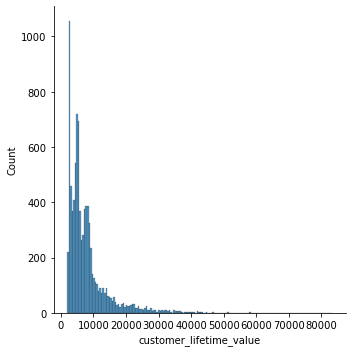

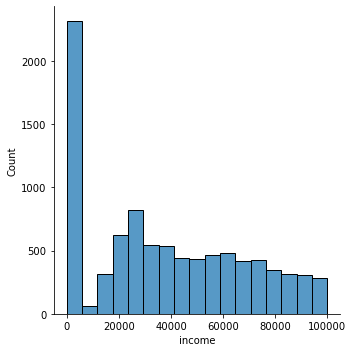

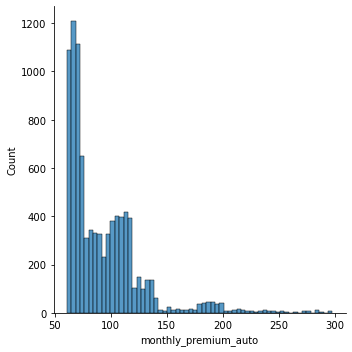

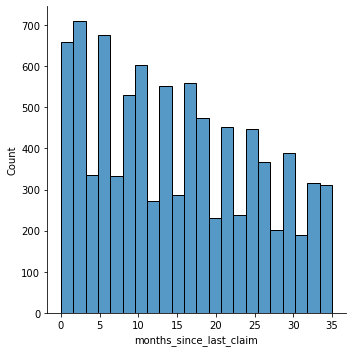

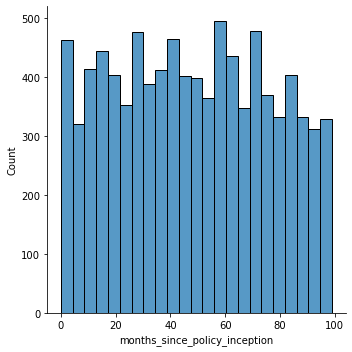

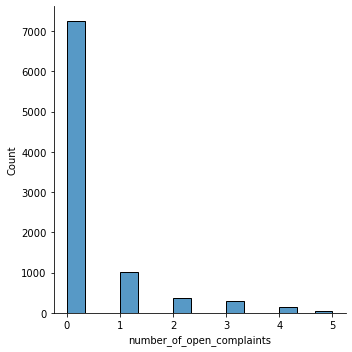

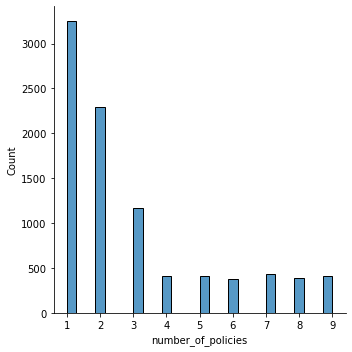

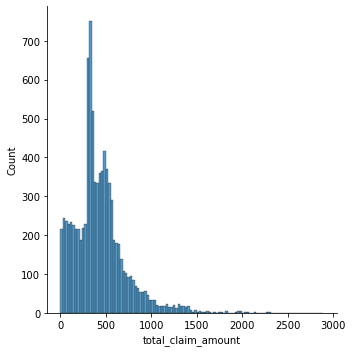

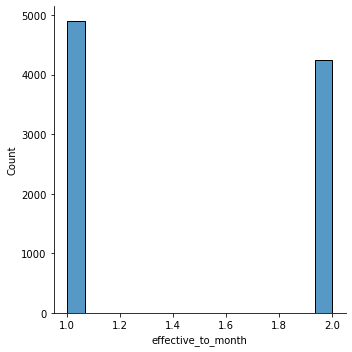

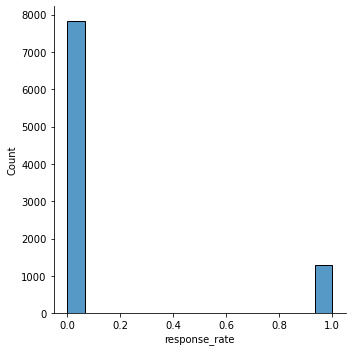

In [65]:
for col in numericals.columns:
    sns.displot(numericals[col])
    plt.show()

### Correlations check

In [66]:
corr_matrix = data.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month,response_rate
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877
effective_to_month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221
response_rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,-0.034221,1.000000


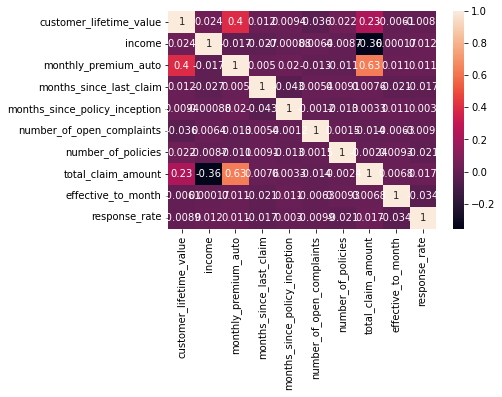

In [67]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### None of the numerical variables seems strongly correlated to the other ones. The strongest correlation is between the total claim amount and the monthly premium so this will probably be the most interesting variable to use. This monthly premium also shows the second strongest correlation, with the customer lifetime. This is not surprising, as insurance companies tend to invoice higher premium for younger drivers, but age is not the only parameter and both info are important to keep.

### X-y split

In [68]:
y = data['total_claim_amount']
X = numericals.drop(['total_claim_amount'], axis = 1)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.00000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.00000
effective_to_month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.00000
response_rate,9134.0,0.143201,0.350297,0.000000,0.000000,0.000000,0.000000,1.00000


In [69]:
X = X.drop(['response_rate', 'effective_to_month'], axis = 1)

### Standardization of numericals

#### We have a mix of counted and measured features but we saw on round 4 that the most interesting ones will probably be the monthly premium and the lifetime of the customer, which are measured, so let's apply the standard scaler.

In [70]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_standardized = transformer.transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
print(X_standardized.shape)

(9134, 7)


### Categoricals

In [62]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [72]:
from sklearn.preprocessing import OneHotEncoder
cat_onehot = categoricals[['state', 'response', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'sales_channel', 'vehicle_class']].copy()
encoder = OneHotEncoder().fit(cat_onehot)
cols = [colname for row in encoder.categories_ for colname in row]
encoded = encoder.transform(cat_onehot).toarray()
cat_onehot_encoded = pd.DataFrame(encoded,columns=cols)
cat_onehot_encoded.head(20)

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Disabled,Employed,Medical Leave,...,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
cols_to_drop = [row[0] for row in encoder.categories_]
cat_onehot_encoded = cat_onehot_encoded.drop(cols_to_drop, axis=1)
cat_onehot_encoded.head()

,California,Nevada,Oregon,Washington,Yes,Employed,Medical Leave,Retired,Unemployed,M,...,Special L2,Special L3,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
cat_label = categoricals[['coverage', 'renew_offer_type', 'education', 'vehicle_size']].copy()
for colname in cat_label.columns:
    print(colname)
    print(cat_label[colname].unique())

coverage
['Basic' 'Extended' 'Premium']
renew_offer_type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
vehicle_size
['Medsize' 'Small' 'Large']


In [79]:
coverage_mapper = { 'Basic':1, 'Extended':2, 'Premium':3 }
education_mapper = { 'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5 }
veh_size_mapper = { 'Small':1, 'Medsize':2, 'Large':3 }

cat_label['coverage'] = cat_label['coverage'].replace(coverage_mapper)
cat_label['education'] = cat_label['education'].replace(education_mapper)
cat_label['vehicle_size'] = cat_label['vehicle_size'].replace(veh_size_mapper)
cat_label['renew_offer_type'] = cat_label['renew_offer_type'].str[-1:]

print(cat_label.shape)
print(cat_onehot_encoded.shape)

(9134, 4)
(9134, 32)


In [80]:
categoricals_encoded = pd.concat([cat_onehot_encoded, cat_label], axis=1)
print(categoricals_encoded.shape)
print(X_standardized.shape)

(9134, 36)
(9134, 7)


In [81]:
X_complete = pd.concat([X_standardized, categoricals_encoded], axis=1)
X_complete.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,coverage,renew_offer_type,education,vehicle_size
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,3,2
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3,2
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1,3,2
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,3,2
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3,2


### Linear Regression

In [82]:
# Shape check between target and features
print(y.shape)
print(X_complete.shape)

(9134,)
(9134, 43)


In [83]:
# Apply Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_complete, y, test_size=0.2, random_state=42)

# And shape control
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 43)
(1827, 43)
(7307,)
(1827,)


In [84]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Validation

In [86]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train)
R2_train = r2_score(y_train, predictions_train)
predictions_test = lm.predict(X_test)
R2_test = r2_score(y_test, predictions_test)

In [87]:
from sklearn.metrics import mean_squared_error
mse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mse_test = np.sqrt(mean_squared_error(y_test,predictions_test))

In [88]:
import math
rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)

11.80362338284414
11.730837083493086


In [89]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

In [90]:
validation_matrix = { 'Train Set': [R2_train, mse_train, rmse_train, mae_train],
                 'Test Set': [R2_test, mse_test, rmse_test, mae_test]
                } 
validation_matrix = pd.DataFrame(validation_matrix, index=['R2','mse', 'rmse', 'mae'])
validation_matrix

,Train Set,Test Set
R2,0.773101,0.761829
mse,139.325525,137.612539
rmse,11.803623,11.730837
mae,95.598705,94.808437
